## Decision Trees
- Decision trees are a widely used models for classification and regression tasks.
Essentially, they learn a hierarchy of “if-else” questions, leading to a decision.
Imagine you want to distinguish between the following four animals: bears, hawks,
penguins and dolphins.
Your goal is to get to the right answer by asking as few if-else questions as possible.
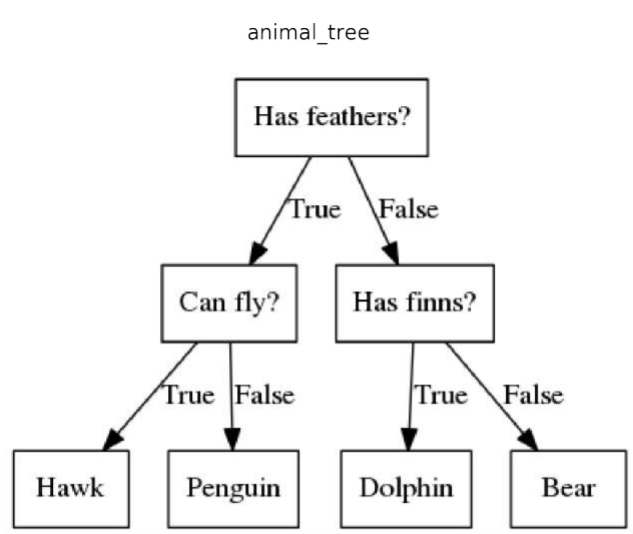


- The deeper the tree, the more complex the decision rules and the fitter the model.

#### Some advantages of decision trees
- Simple to understand and to interpret. Trees can be visualised.

- Requires little data preparation. Other techniques often require data normalisation, 
    dummy variables need to be created and blank values to be removed. 
- Note however that this module does not support missing values.

-  invariant to scaling of the data: As
each feature is processed separately, and the possible splits of the data don't depend
on scaling, no preprocessing like normalization or standardization of features is
needed for decision tree algorithms.
#### Disadvantages of decision trees 
- Decision-tree learners can create over-complex trees that do not generalise the data well. This is called overfitting. Mechanisms such as pruning, setting the minimum number of samples required at a leaf node or setting the maximum depth of the tree are necessary to avoid this problem.

- Decision trees can be unstable because small variations in the data might result in a completely different tree being generated. This problem is mitigated by using decision trees within an ensemble.

#### PROJECT AIM 

Exploring the difer\rent Tree based model over discrette Data 

#### Import required packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import (precision_score,
                           recall_score,
                           f1_score,
                           accuracy_score,
                           precision_recall_curve,
                           roc_auc_score,
                            confusion_matrix,
                            roc_curve, ConfusionMatrixDisplay)

In [2]:
df = pd.read_csv("telecom_churn.csv")
df.head(5)

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


In [3]:
df.shape

(3333, 11)

### DATA EXPLORATION 

In [4]:
df.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [6]:
df.columns

Index(['Churn', 'AccountWeeks', 'ContractRenewal', 'DataPlan', 'DataUsage',
       'CustServCalls', 'DayMins', 'DayCalls', 'MonthlyCharge', 'OverageFee',
       'RoamMins'],
      dtype='object')

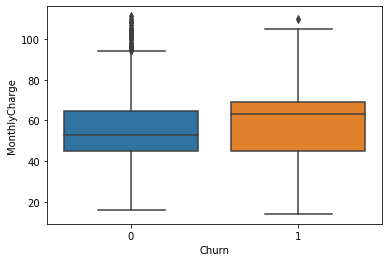

In [7]:
sns.boxplot(x = 'Churn', y ='MonthlyCharge', data = df  );
#As can see from below, the people who tend to churn are people with high monthly charge in the catgeory of 1  

### Data splitting 

In [8]:
x = df.drop('Churn', axis = 1)
y = df['Churn']

In [9]:
df['Churn'].value_counts(normalize = True) #This connote an imbalance data set so upon prediting, many will tend not to churn; 
# Now we will apply startify as we have sets of imbalance data, stratify will help split to have blended proportion in the diff set to evade biasness 

0    0.855086
1    0.144914
Name: Churn, dtype: float64

In [10]:
# Split into train, test and validation - Hyperparameer tunning works on the vaoidation sets 
from sklearn.model_selection import train_test_split

In [11]:
# Here the data x and y is splitted into validation and test 1.e test size is 20%
x_train_val, x_test, y_train_val, y_test = train_test_split(x,y, test_size = 0.2, random_state = 0, stratify = y) 

# Now split the validation sets into validation and train, now split the 80% into
x_train, x_val, y_train, y_val = train_test_split(x_train_val,y_train_val, 
                                                  test_size = 0.2, random_state = 0, 
                                                  stratify = y_train_val ) 

## Decision tree implementation in scikit-learn

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import confusion_matrix
#from models import train, evaluate i have doen manually below as the extension isnt py but ipyn
#from Modells import train, evaluate #Model is already prepared module having sets of functions to handle the evaluation and model/training the data 
#I had to call the function manually s 

In [13]:
# No normalisation because it is decison tree S

In [14]:
def train(model, x , y):
    '''
    function to train the model and compute accuracy 
    model: model algorithm not yet trained 
    x: Train features
    y: Train Target 
    '''
    trained_model = model.fit(x,y)
    preds = trained_model.predict(x)
    acc = accuracy_score(y, preds)
    print(f"Train Accuracy: {acc}")
    return trained_model 

In [15]:
def evaluate (model, x, y, threshold = 0.5):
    """ function to evaluate our trained model with different metrics 
    model : Trained Model (classifier)
    
    x:validation features 
    y: Target in validation data 
    Threshold: Value to filter predictions 
    """
    
    pred_proba = model.predict_proba(x)[:, 1] #This will return x 2 array where the 2 is column with prob for the 
    pred_class = np.round(pred_proba  > threshold ) #This converts to 0 or 1 
    acc = accuracy_score (y, pred_class)
    recall = recall_score(y, pred_class)
    precision = precision_score (y, pred_class)
    f1 = f1_score (y, pred_class)
    
    df = pd.DataFrame({ "Accuracy": acc, 
                       "Precision": precision, 
                       "Recall":recall,
                       "F1" : f1}, index = [0])
    conf = confusion_matrix(y, pred_class, labels = [0,1]) ##If the class is more than 2, then use 0, 1, 2 
    disp = ConfusionMatrixDisplay (conf, display_labels = [0,1]) #If the class is more than 2, then use 0, 1, 2 
    disp.plot()
    plt.show()
    return df 

In [16]:
# function to compute different metrics to check performance of a regression model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check regression model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class)  # to compute recall
    precision = precision_score(target, pred_class)  # to compute precision
    f1 = f1_score(target, pred_class)  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1,
        },
        index=[0],)
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()
 
    return df_perf

In [43]:
dtree = DecisionTreeClassifier(random_state = 0)

In [44]:
dtree_model = train(dtree, x_train, y_train)

Train Accuracy: 1.0


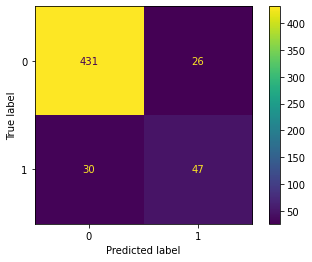

,Accuracy,Precision,Recall,F1
0,0.895131,0.643836,0.61039,0.626667


In [45]:
# Evaluate the mpdel

dtree_df = evaluate(dtree_model, x_val, y_val)
dtree_df #CAlling this return returns the dataframe making up the accuracy scores 

#### Out of 77people in the data that churned, the model correctly predicted 47 and incorrectly predicted 30people not to churn 

Out of 457 people in the data that do not churn, the model correctly predicted 431people not churn but incorrectly predicted 26people.
Of 77, 49 correctly. 

TN - 431
FP - 26
FN - 30
TP - 47

For precision - Understand from the angle that precision is all about prediction, so out of incorrectly predicxted or variance churn (28), 27 in the FP and 1 in the FN.


### Visualise Tree 



In [46]:
feat_names = list(df)
def plot_decision_tree(dec_tree):
    plt.figure(figsize = (20,30) )
    tree.plot_tree(dtree_model, feature_names = feat_names, class_names = True, filled = True, node_ids = True, fontsize = 9)
    plt.show()

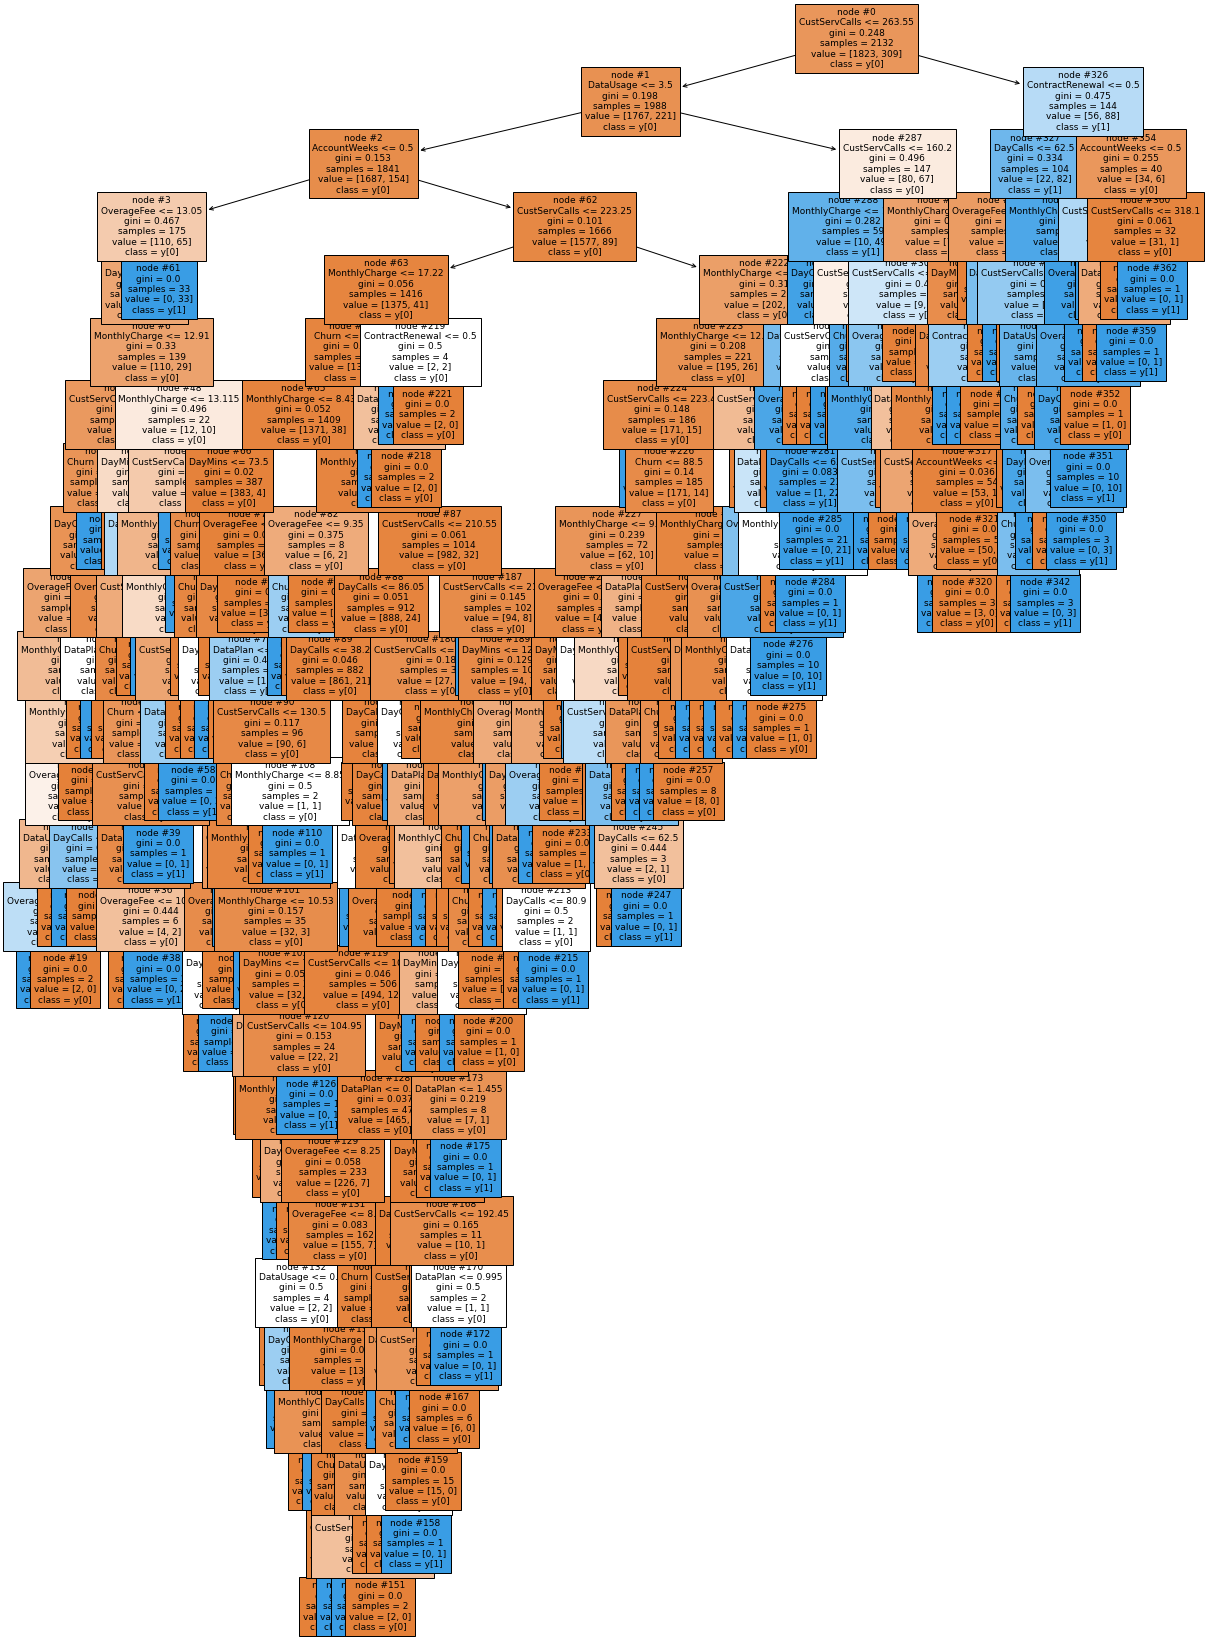

In [47]:
plot_decision_tree(dtree_model) 
# Here based on the gini (lowest gini), the feature selected for further analysis breakdown  or node leaf
# or rather based on the model trained, it then gave its equivalent tree that will produce tree result 

### Feature Importance 

In [48]:
importances = dtree_model.feature_importances_
importances #importance factorof each variable

array([0.04454575, 0.07002987, 0.05087796, 0.03310657, 0.09916186,
       0.30204825, 0.04948891, 0.08189135, 0.13904647, 0.12980301])

In [49]:
indices = np.argsort(importances)
indices

array([3, 0, 6, 2, 1, 7, 4, 9, 8, 5], dtype=int64)

In [50]:
importances = dtree_model.feature_importances_
# indices = np.argsort(importances)

def plot_importance(importances):
    indices = np.argsort(importances)
    plt.figure(figsize = (12,12))
    plt.title ("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color = "violet", align = "center")
    plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
    plt.xlabel("Important values")
    plt.show()

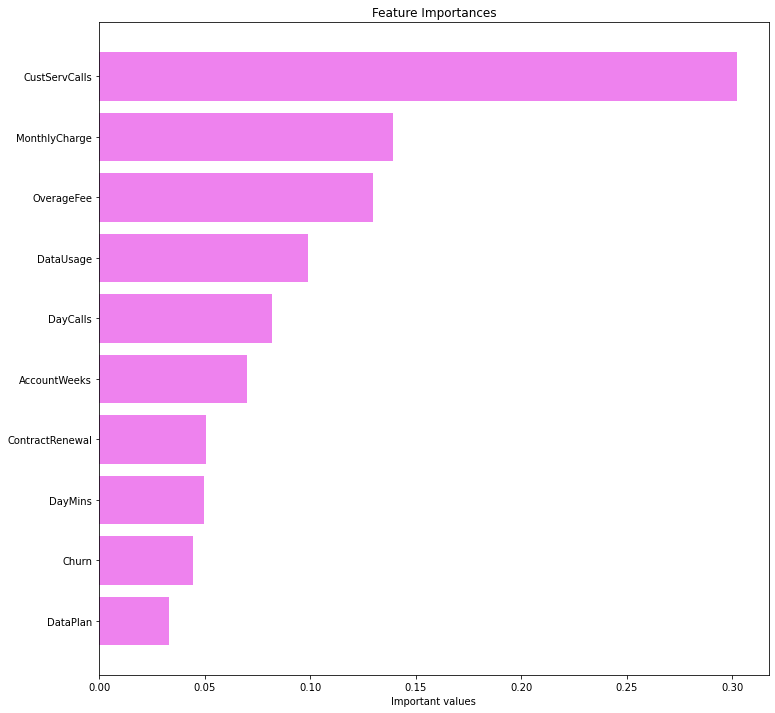

In [51]:
plot_importance (importances)

### As can see the decision tree used the variable with lowest gini and it overfit with more than  1 leaf node; and feature importance validating it 
Based on this; always first improve the model whoch if feature importance now validates it optimized one, good for us  

Steps

-  Improve Model 

-  Carryout feature importance approach 

## Model Imporvement with Class weight and Prunning (Max depth approach)

Class weight is an approach where a larger value is set to minority (Class 0 will take 0.1 being the majprity class, and  class 1 - 90 being minority class so the mdoel can understudy the trend of the minority class being set to a higher weight for better modelling




) as we know that the model will tend to focus on the majority and then overfit, here, set class weight will evade overfit having set a huigher value to the minority class as thisis to tell te model to focus more on the trend in the minority to evade overfitting 

In [52]:
dtree2 = DecisionTreeClassifier(random_state=0, class_weight = {0:0.1, 1:0.9}, max_depth = 4)

In [53]:
# Train
dtree2_model = train(dtree2, x_train, y_train)

Train Accuracy: 0.8883677298311444


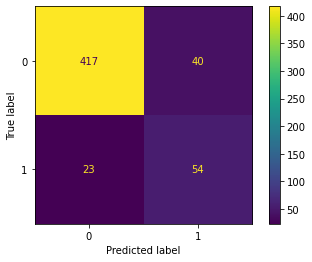

,Accuracy,Precision,Recall,F1
0,0.882022,0.574468,0.701299,0.631579


In [54]:
# Evaluate 
dtree2_df = evaluate (dtree2_model, x_val, y_val)
dtree2_df

#### False postive increased and false negative reduced and accuracy increased  

#### OPTIMIZE MODEL WITH THRESHOLD TWEAKING 

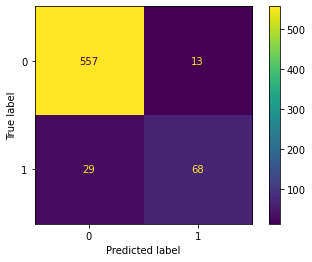

,Accuracy,Precision,Recall,F1
0,0.937031,0.839506,0.701031,0.764045


In [55]:
test = evaluate ( dtree2_model, x_test, y_test, threshold = 0.9)
test

#### Observation 

Recall improved with adjust to the threshold; now based on perfromance score  

Based on score above, we can then rebuid model with the dtree2 

In [56]:
# REBUILD MODEL 

In [57]:
importances = dtree2_model.feature_importances_
indices = np.argsort(importances)

def plot_importance(importances):
    indices = np.argsort(importances)
    plt.figure(figsize = (12,12))
    plt.title ("Feature Importances")
    plt.barh(range(len(indices)), importances[indices], color = "violet", align = "center")
    plt.yticks(range(len(indices)), [feat_names[i] for i in indices])
    plt.xlabel("Important values")
    plt.show()

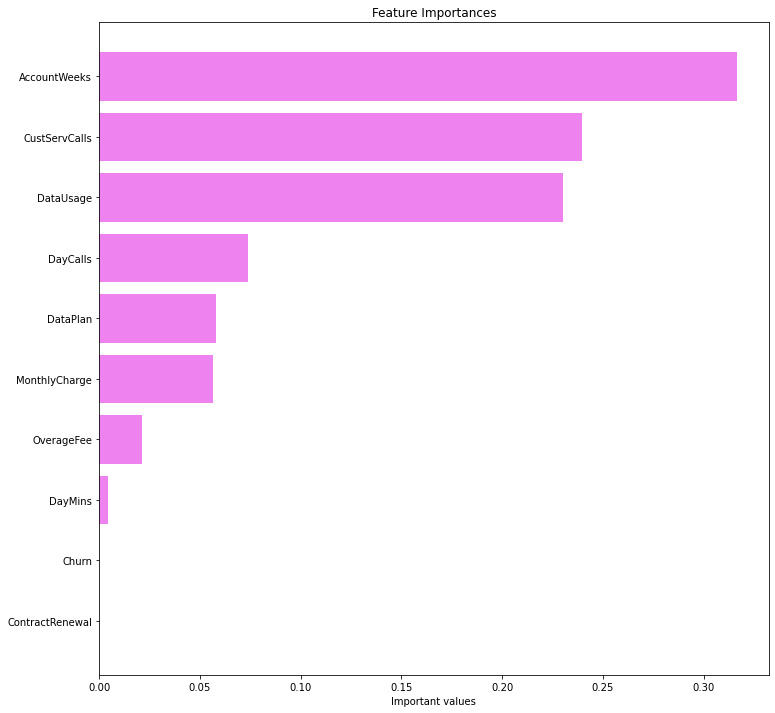

In [58]:
plot_importance(importances)

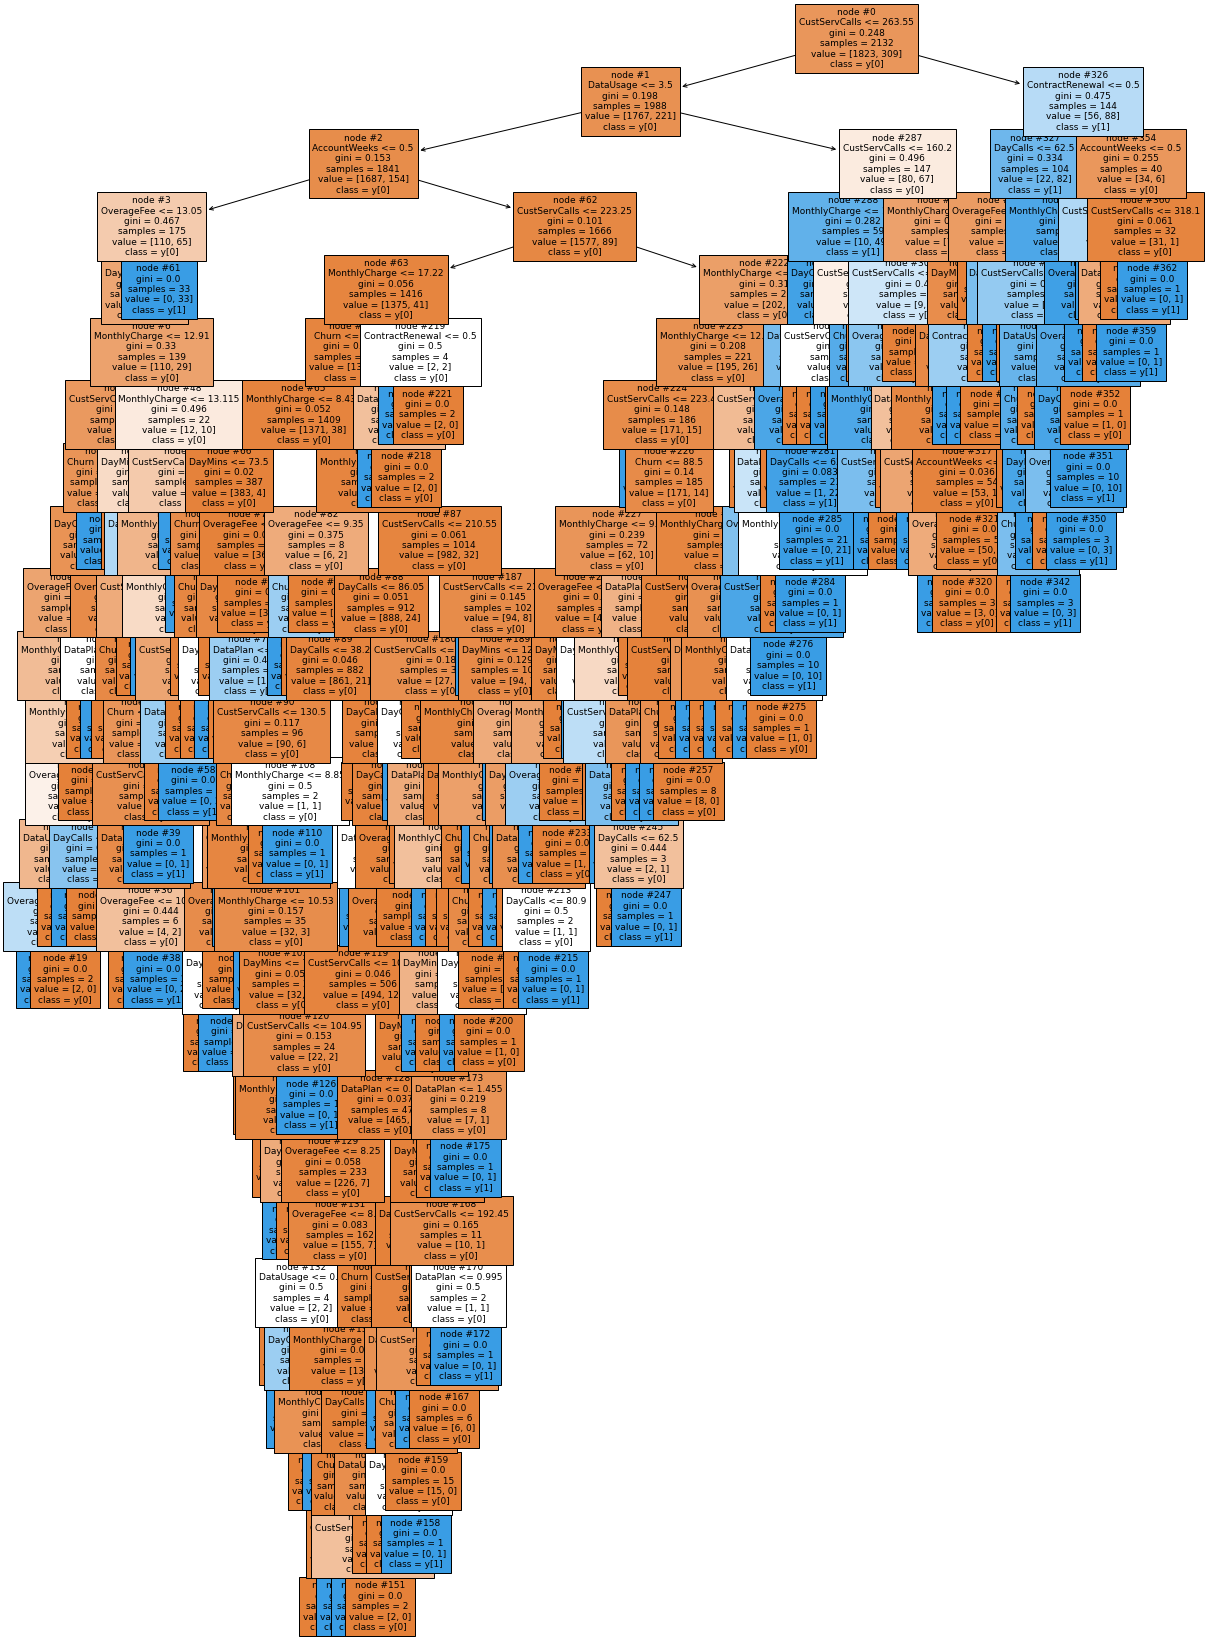

In [59]:
plot_decision_tree(dtree2_model)

## Controlling complexity of Decision Trees
- Typically, building a tree as described above, and continuing until all leaves are pure
leads to models that are very complex and highly overfit to the training data. The
presence of pure leaves mean that a tree is 100% accurate on the training set; each
data point in the training set is in a leaf that has the correct majority class.



- There are two common strategies to prevent overfitting: stopping the creation of the
tree early, also called **pre-pruning**, or building the tree but then removing or collapsing 
nodes that contain little information, also called **post-pruning** or just **pruning**. 
Possible criteria for pre-pruning include limiting the maximum depth of the tree,
limiting the maximum number of leaves, or requiring a minimum number of points
in a node to keep splitting it.

### Applying pre-pruning strategy
- One possible way is to stop building the tree after a certain depth has been reached.
Here we set max_depth=4, meaning only four consecutive questions can be asked.

## ENSEMBLE METHOD 

## Ensembles of Decision Trees
- Ensembles are methods that combine multiple machine learning models to create
more powerful models.
There are many models in the machine learning literature that belong to this category, 
but there are two ensemble models that have proven to be effective on a wide
range of datasets for classification and regression, both of which use decision trees as
their building block: **Random Forests** and **Gradient Boosted Decision Trees**.
    
    
### Random Forests
-  A main drawback of decision trees is that they tend to overfit the
training data. Random forests are one way to address this problem. Random forests are essentially a collection of
decision trees, where each tree is slightly different from the others.
The idea of random forests is that each tree might do a relatively good job of predicting, 
but will likely overfit on part of the data.
If we build many trees, all of which work well and overfit in different ways, we can
reduce the amount of overfitting by averaging their results.


- To build a tree, we first take what is called a bootstrap sample of our data. A bootstrap
sample means from our n_samples data points, we repeatedly draw an example randomly with 
replacement (i.e. the same sample can be picked multiple times), n_samples times. 
This will create a dataset that is as big as the original dataset, but some
data points will be missing from it, and some will be repeated.



- Next, a decision tree is built based on this newly created dataset. However, the algorithm 
we described for the decision tree is slightly modified. Instead of looking for
the best test for each node, in each node the algorithm randomly selects a subset of
the features, and looks for the best possible test involving one of these features. The
amount of features that is selected is controlled by the **max_features** parameter.




- To make a prediction using the random forest, the algorithm first makes a prediction
for every tree in the forest. For regression, we can average these results to get our final
prediction. For classification, a "soft voting" strategy is used. This means each algorithm 
makes a "soft" prediction, providing a probability for each possible output
label. The probabilities predicted by all the trees are averaged, and the class with the
highest label is predicted.

### Implementing Random Forests in scikit learn

In [64]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instanntiate the classifier
rf = RandomForestClassifier( random_state = 0, n_jobs = -1, max_depth = 4)

# train the model
rf_model = train(rf, x_train, y_train)
rf_model
# performance scores



Train Accuracy: 0.9122889305816135


RandomForestClassifier(max_depth=4, n_jobs=-1, random_state=0)

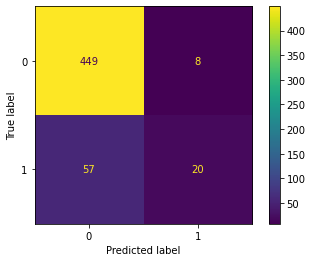

,Accuracy,Precision,Recall,F1
0,0.878277,0.714286,0.25974,0.380952


In [65]:
rf_df = evaluate(rf_model, x_val, y_val)
rf_df

### Visualizing feature importances for the Random Forests Algorithm

In [66]:
# import the random forest model
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# instanntiate the classifier
rf = RandomForestClassifier( random_state = 0, n_jobs = -1, max_depth = 4, class_weight= {0:0.15, 1:0.9})

# train the model
rf_model = train(rf, x_train, y_train)
rf_model
# performance scores


Train Accuracy: 0.9066604127579737


RandomForestClassifier(class_weight={0: 0.15, 1: 0.9}, max_depth=4, n_jobs=-1,
                       random_state=0)

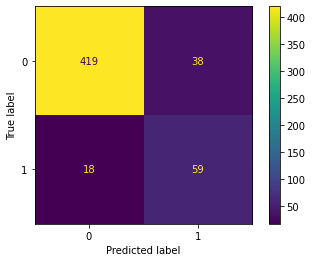

,Accuracy,Precision,Recall,F1
0,0.895131,0.608247,0.766234,0.678161


In [67]:
rf_df = evaluate(rf_model, x_val, y_val)
rf_df

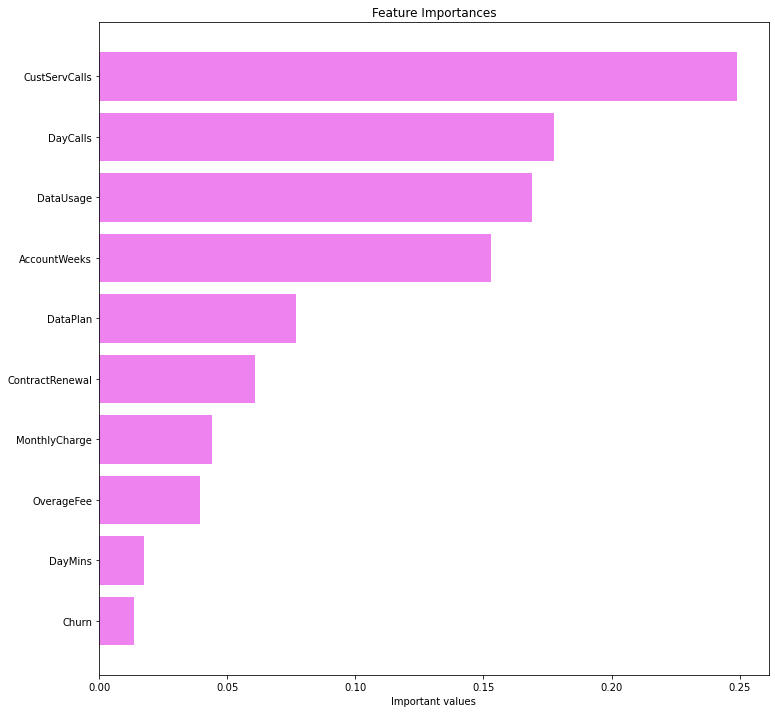

In [68]:
rf_imp = rf_model.feature_importances_
plot_importance(rf_imp)

## Gradient Boosting Machines
- Gradient boosted regression trees is another ensemble method that combines multiple decision trees to a more powerful model. Despite the “regression” in the name,
these models can be used for regression and classification.




- In contrast to random forests, gradient boosting works by building trees in a serial
manner, where each tree tries to correct the mistakes of the previous one. There is no
randomization in gradient boosted regression trees; instead, strong pre-pruning is
used. Gradient boosted trees often use very shallow trees, of depth one to five, often
making the model smaller in terms of memory, and making predictions faster.




- The main idea behind gradient boosting is to combine many simple models (in this
context known as weak learners), like shallow trees. Each tree can only provide good
predictions on part of the data, and so more and more trees are added to iteratively
improve performance.

### Implementing Gradient Boosting in scikit learn

Train Accuracy: 0.9568480300187617


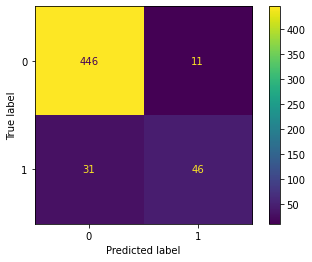

,Accuracy,Precision,Recall,F1
0,0.921348,0.807018,0.597403,0.686567


In [76]:
# import the gradient boosting model
from sklearn.ensemble import GradientBoostingClassifier

# instanntiate the classifier

gb = GradientBoostingClassifier(random_state = 0)

# train the model
gb_model = train(gb, x_train, y_train)

# performance scores
gb_df = evaluate(gb_model, x_val, y_val)
gb_df

### Reducing Overfitting
- To reduce overfitting, we applied strong pre-pruning by limiting the depth of the tree
- Also, we can adjust the learning rate parameter which controls how each tree tries to correct previous trees. 

### Saving your Model 

In [85]:
import pickle 

fp = open("rf_model.pkl", "wb")  #create a new file name - re_model.pkl (in pickle format) and in writ mode (binary mode)
pickle.dump(rf_model, fp) #dump the rf_model already built into fp 

fp.close() #Then close fp  

### Load Model 

In [86]:
fp_new = open("rf_model.pkl", "rb")  #say u want to mak use of model to make prediction or wat so ever; u will read in binary and save for use into a new file name n 
rf_model_new = pickle.load(fp_new) #then load the model and save as rf_model_new and then make use;recall, rf_model is an already trained model     

In [87]:
rf_model_new.feature_importances_

array([0.01346086, 0.1527402 , 0.06082433, 0.07673749, 0.16896371,
       0.24883514, 0.0175634 , 0.17741832, 0.04391724, 0.03953931])